In [1]:
# reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import polars as pl
import timeit

random = np.random.RandomState(112)
test_range = range(3, 8)

In [2]:
def test_pandas_csv_write(df):
    df.to_csv('test_pandas.csv', mode='w', index=False)
    return 'test_pandas.csv'


def test_pandas_csv_read():
    return pd.read_csv('test_pandas.csv')


def test_polars_csv_write(df):
    df.write_csv('test_polars.csv')
    return 'test_polars.csv'


def test_polars_csv_read():
    return pl.read_csv('test_polars.csv')


def test_pandas_json_write(df):
    df.to_json('test_pandas.json')
    return 'test_pandas.json'


def test_pandas_json_read():
    return pd.read_json('test_pandas.json')


def test_polars_json_write(df):
    df.write_json('test_polars.json')
    return 'test_polars.json'


def test_polars_json_read():
    return pl.read_json('test_polars.json')


def test_hdf_fixed_write(df):
    df.to_hdf('test_fixed.hdf', 'test', mode='w')
    return 'test_fixed.hdf'


def test_hdf_fixed_read():
    return pd.read_hdf('test_fixed.hdf', 'test')


def test_hdf_fixed_write_compress(df):
    df.to_hdf('test_fixed_compress.hdf', 'test', mode='w', complib='blosc')
    return 'test_fixed_compress.hdf'


def test_hdf_fixed_read_compress():
    return pd.read_hdf('test_fixed_compress.hdf', 'test')


def test_hdf_table_write(df):
    df.to_hdf('test_table.hdf', 'test', mode='w', format='table')
    return 'test_table.hdf'


def test_hdf_table_read():
    return pd.read_hdf('test_table.hdf', 'test')


def test_hdf_table_write_compress(df):
    df.to_hdf('test_table_compress.hdf', 'test', mode='w', complib='blosc', format='table')
    return 'test_table_compress.hdf'


def test_hdf_table_read_compress():
    return pd.read_hdf('test_table_compress.hdf', 'test')


def test_pandas_arrowipc_write(df):
    df.to_feather('test_pandas.arrow')
    return 'test_pandas.arrow'


def test_pandas_arrowipc_read():
    return pd.read_feather('test_pandas.arrow')


def test_polars_arrowipc_write(df):
    df.write_ipc('test_polars.arrow')
    return 'test_polars.arrow'


def test_polars_arrowipc_read():
    return pl.read_ipc('test_polars.arrow')


def test_pandas_parquet_write(df):
    df.to_parquet('test_pandas.parquet')
    return 'test_pandas.parquet'


def test_pandas_parquet_read():
    return pd.read_parquet('test_pandas.parquet')


def test_polars_parquet_write(df):
    df.write_parquet('test_polars.parquet')
    return 'test_polars.parquet'


def test_polars_parquet_read():
    return pl.read_parquet('test_polars.parquet')


def test_pickle_write(df):
    df.to_pickle('test.pkl')
    return 'test.pkl'


def test_pickle_read():
    return pd.read_pickle('test.pkl')


def test_pickle_write_compress(df):
    df.to_pickle('test.pkl.compress', compression='xz')
    return 'test.pkl.compress'


def test_pickle_read_compress():
    return pd.read_pickle('test.pkl.compress', compression='xz')
    

read_func = [
    test_pandas_csv_read,
    test_pandas_json_read,
    test_polars_csv_read,
    test_polars_json_read,
    test_hdf_fixed_read,
    test_hdf_fixed_read_compress,
    test_hdf_table_read,
    test_hdf_table_read_compress,
    test_pandas_arrowipc_read,
    test_pandas_parquet_read,
    test_polars_arrowipc_read,
    test_polars_parquet_read,
    test_pickle_read,
    test_pickle_read_compress
]

write_func = [
    test_pandas_csv_write,
    test_pandas_json_write,
    test_polars_csv_write,
    test_polars_json_write,
    test_hdf_fixed_write,
    test_hdf_fixed_write_compress,
    test_hdf_table_write,
    test_hdf_table_write_compress,
    test_pandas_arrowipc_write,
    test_pandas_parquet_write,
    test_polars_arrowipc_write,
    test_polars_parquet_write,
    test_pickle_write,
    test_pickle_write_compress
]

filenames = [
    'test_pandas.csv',
    'test_pandas.json',
    'test_polars.csv',
    'test_polars.json',
    'test_fixed.hdf',
    'test_fixed_compress.hdf',
    'test_table.hdf',
    'test_table_compress.hdf',
    'test_pandas.arrow',
    'test_pandas.parquet',
    'test_polars.arrow',
    'test_polars.parquet',
    'test.pkl',
    'test.pkl.compress'
]


In [3]:
def test_io(dfpd, dfpl, loops=5):
    read_speed = dict()
    write_speed = dict()
    filesize = dict()
    
    for func in write_func:
        key = func.__name__
        write_speed[key] = 0.0
#         print('Testing function', key)
        if "polars" in func.__name__:
            df = dfpl
        else:
            df = dfpd
        for _ in range(loops):
            start = timeit.default_timer()
            func(df)
            end = timeit.default_timer()
            write_speed[key] += end - start
        write_speed[key] /= loops
    
    for func, filename in zip(read_func, filenames):
        key = func.__name__
        read_speed[key] = 0.0
#         print('Testing function', key)
        for _ in range(loops):
            start = timeit.default_timer()
            df_read = func()
            end = timeit.default_timer()
            read_speed[key] += end - start
        read_speed[key] /= loops
        filesize[filename] = os.path.getsize(filename)
    
    return write_speed, read_speed, filesize

def show_result(df_name, write_speed, read_speed, filesize):
    read_data = dict()
    write_data = dict()
    size_data = dict()
    
    index = []
    data = []
    for rfunc in read_func:
        read_data[rfunc.__name__] = list()
        for i in test_range:
            read_data[rfunc.__name__].append(read_speed[i][rfunc.__name__])
        index.append(rfunc.__name__)
        data.append(read_data[rfunc.__name__])
            
    for wfunc in write_func:
        write_data[wfunc.__name__] = list()
        for i in test_range:
            write_data[wfunc.__name__].append(write_speed[i][wfunc.__name__])
        index.append(wfunc.__name__)
        data.append(write_data[wfunc.__name__])
        
    for filename in filenames:
        size_data[filename] = filesize[filename] = list()
        for i in test_range:
            size_data[filename].append(filesize[i][filename] / 1e6)
        index.append(filename)
        data.append(size_data[filename])
    
    df = pd.DataFrame(index=index, data=data, columns=['10^%d' % i for i in test_range])
    df.index.name = 'function'
    df.to_csv('data/%s.csv' % df_name.replace(' ', ''))

    
    plt.clf()
    fig, ax = plt.subplots(3, 1, figsize=(10, 20))
    plt.sca(ax[0])

    colormap = plt.cm.nipy_spectral
    colors = colormap(np.linspace(0, 1, len(read_func)))
    for a in ax:
        a.set_prop_cycle('color', colors)

    for rfunc in read_func:
        d = read_data[rfunc.__name__]
        plt.semilogy(np.arange(len(d)), d, marker="o", label=rfunc.__name__)
    plt.title('Read Speed (%s)' % df_name, fontsize=15)
    plt.ylabel('Seconds', fontsize=13)
    plt.xticks(np.arange(len(list(test_range))), ["$10^{}$".format(x) for x in test_range])
    plt.legend(frameon=True)
    
    plt.sca(ax[1])
    for wfunc in write_func:
        d = write_data[wfunc.__name__]
        plt.semilogy(np.arange(len(d)), d, marker="o", label=wfunc.__name__)
    plt.title('Write Speed (%s)' % df_name, fontsize=15)
    plt.ylabel('Seconds', fontsize=13)
    plt.xticks(np.arange(len(list(test_range))), ["$10^{}$".format(x) for x in test_range])
    plt.legend(frameon=True)
    
    plt.sca(ax[2])
    for filename in filenames:
        d = size_data[filename]
        plt.semilogy(np.arange(len(d)), d, marker="o", label=filename)
    plt.title('File Size (%s)' % df_name, fontsize=15)
    plt.ylabel('MB', fontsize=13)
    plt.xticks(np.arange(len(list(test_range))), ["$10^{}$".format(x) for x in test_range])
    plt.legend(frameon=True)
    
    plt.savefig('images/%s.png' % df_name.replace(' ', ''), bbox_inches="tight")
    plt.show()
    

In [4]:
write_speed, read_speed, filesize = dict(), dict(), dict()
for i in test_range:
    data = dict((x, random.randn(10 ** i)) for x in ('a', 'b', 'c', 'd'))
    dfpd = pd.DataFrame(data)
    dfpl = pl.DataFrame(data)
    print(dfpd.info())
    print(dfpl.describe())
    write_speed_i, read_speed_i, filesize_i = test_io(dfpd, dfpl)
    write_speed[i] = write_speed_i
    read_speed[i] = read_speed_i
    filesize[i] = filesize_i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1000 non-null   float64
 1   b       1000 non-null   float64
 2   c       1000 non-null   float64
 3   d       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
None
shape: (9, 5)
┌────────────┬───────────┬───────────┬───────────┬───────────┐
│ describe   ┆ a         ┆ b         ┆ c         ┆ d         │
│ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str        ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 1000.0    ┆ 1000.0    ┆ 1000.0    ┆ 1000.0    │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ mean       ┆ -0.006023 ┆ 0.022447  ┆ 0.032058  ┆ -0.027    │
│ std        ┆ 1.009267  ┆ 1.057289  ┆ 0.992578  ┆ 0.978077  │
│ min        ┆ -3.342674 ┆ -3.23432  ┆ -2.9567

<Figure size 640x480 with 0 Axes>

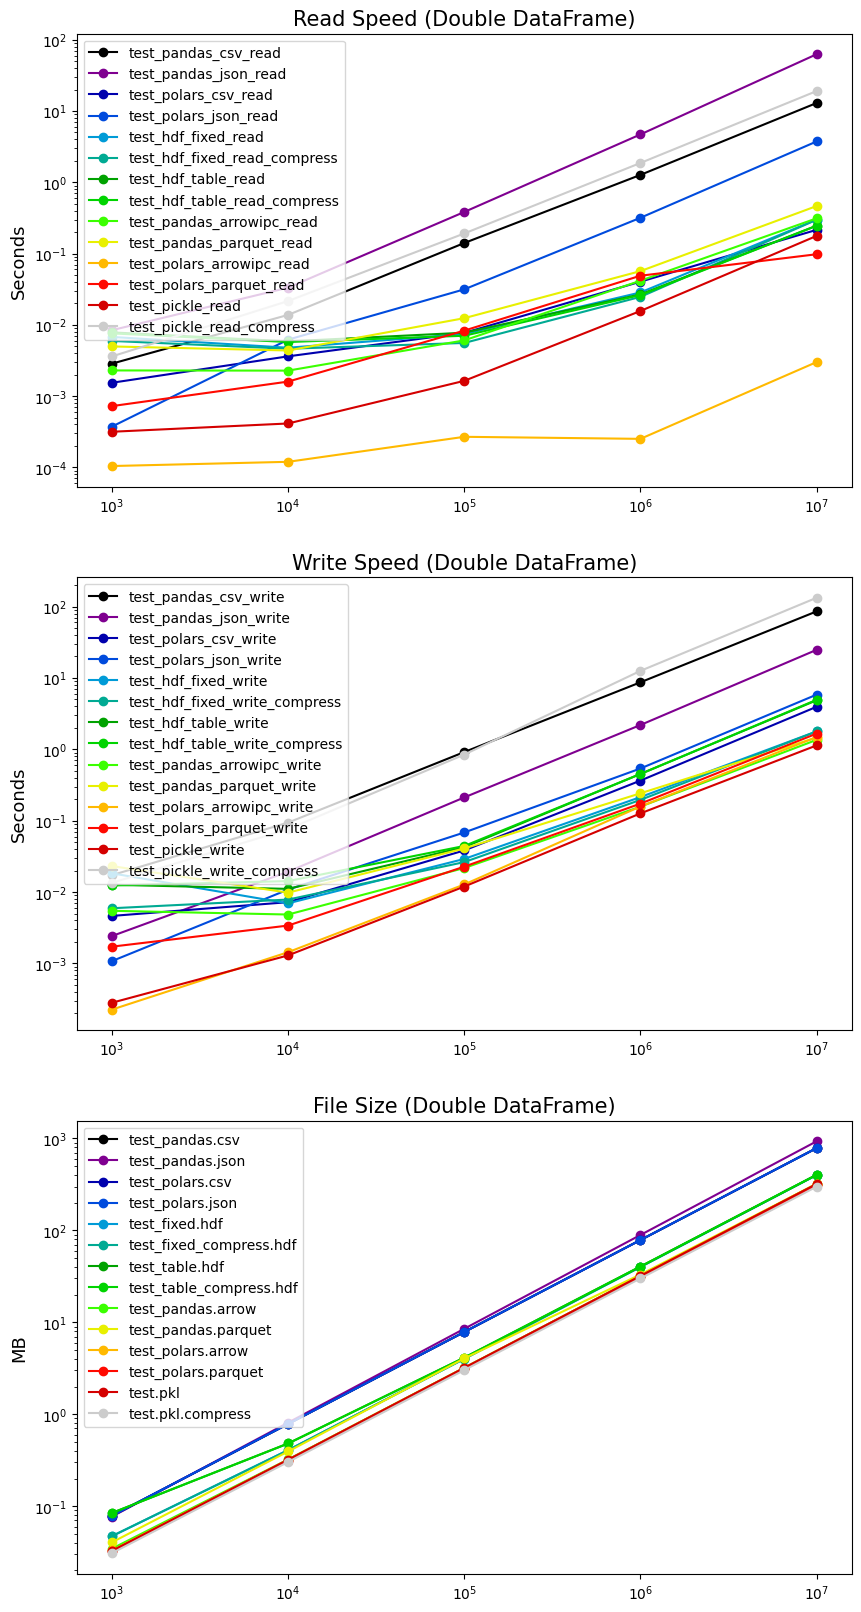

In [5]:
show_result('Double DataFrame', write_speed, read_speed, filesize)

In [6]:
for filename in filenames:
    os.remove(filename)